In [1]:
import backtrader as bt 
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt
from datetime import datetime

# %matplotlib widget

In [23]:
class MaCrossStrategy(bt.Strategy):
    
    params = (
                ('fast_length', 5),
                ('slow_length', 25)
            )
    
    def __init__(self):
        ma_fast = bt.ind.SMA(period = self.params.fast_length)
        ma_slow = bt.ind.SMA(period = self.params.slow_length)
        
        self.crossover = bt.ind.CrossOver(ma_fast, ma_slow)
        
        def next(self):
            if not self.position:
                if self.crossover > 0:
                    self.buy()
            elif self.crossover < 0:
                self.close()
                

In [29]:
class SMAExitSignal(bt.Indicator):
    lines = ('signal',)
    params = (('p1', 5), ('p2', 30),)

    def __init__(self):
        sma1 = bt.indicators.SMA(period=self.p.p1)
        sma2 = bt.indicators.SMA(period=self.p.p2)
        self.lines.signal = sma1 - sma2
        
    def next(self):
        if not self.position:
            if self.lines.signal > 0:
                self.buy()
        elif self.lines.signal < 0:
            self.close()

In [30]:
cerebro = bt.Cerebro()
fromdate = datetime(2015, 1, 1)
todate = datetime(2018, 12, 31)
data = bt.feeds.YahooFinanceData(dataname = 'AAPL', fromdate=fromdate, todate=todate)
cerebro.adddata(data)

In [31]:
cerebro.addstrategy(SMAExitSignal)

0

In [32]:
cerebro.broker.setcash(1000.0)
cerebro.addsizer(bt.sizers.PercentSizer, percents=10)
back = cerebro.run()

AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Indicat' object has no attribute '_addobserver'

In [ ]:
cerebro.broker.getvalue()

<IPython.core.display.Javascript object>


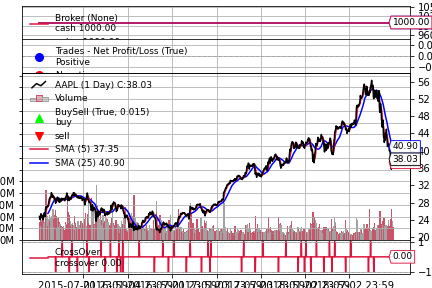

[[<Figure size 432x288 with 5 Axes>]]

In [28]:
cerebro.plot()